# Reading in LIGO data for GW170817

*I grabbed figure 1 from here : https://www.ligo.org/detections/GW170817/paper/GW170817-PRLpublished.pdf , saved as LIGO.png,  and used WebPlotDigitier: https://apps.automeris.io/wpd/, and saved as digitized.csv.

*Now I want to interpolate and return a smooth clean curve*

In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
df = pd.read_csv('digitized.csv')
df.sort_values(by="t", inplace=True)
df['t'] -= 0.5
df

,t,f
7,-27.755022,37.571047
8,-25.823567,38.517856
9,-24.138519,39.488526
10,-21.548286,41.849617
11,-18.795053,43.261667
12,-17.149802,45.469573
13,-15.012585,47.003763
14,-13.530758,50.229185
15,-12.462150,51.069547
0,-11.215022,52.146935


*Fit a simple powerlaw to these data points to get a smooth curve*

[2.16553891e-06 3.73532977e-01]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


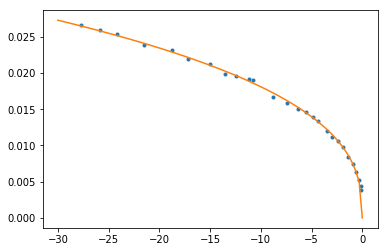

In [5]:
def func(x, a, b):
    return (-a*x)**b

period = 1./df['f'].values
tArr = np.linspace(-30, 0, 100)

popt, pcov = curve_fit(func, df['t'].values, period)
print(popt)
pFit = func(tArr, *popt)

f,ax= plt.subplots()
ax.plot(df['t'].values, period, '.')
plt.plot(tArr, pFit)

*Write this to a "raw" file*

In [4]:
import csv
csvfile = open("GW170817_period.raw", 'wt')
csvwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
for i in range(len(tArr)):
    csvwriter.writerow([tArr[i],pFit[i], 3., 4., 5., 6., 7., 8., 9.])
csvfile.close()